<a href="https://colab.research.google.com/github/jyotisubham1/Music-Instrument-Recognition-/blob/main/Music_Instrument_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/jyotisubham1/Music-Instrument-Recognition.git

Cloning into 'Music-Instrument-Recognition'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), 1.58 KiB | 1.58 MiB/s, done.


# Music Instrument Recognition using **KNN** 

##Problem Statement
###Identifying and classifying musical instruments from audio data files can be referred to as music instrument recognition. This field's main challenge is dealing with variations in instrument sounds created by multiple playing styles, musical genres, and background noise. The ultimate goal of this project is to establish an effective and highly accurate music instrument recognition system that can be utilized in real-world circumstances.

## Tasks


 1. Installing necessery package and Importing Data
   - Installing Librosa which is a key pacakge for audio classification and recognition.

 2. Model selection
    - Choosing a pre trained dataset.
 
 3. Feature extraction
    - Extracting the visual features learned by the model from the dataset.

 4. Visualization techniques
    - Using various visualization techniques, such as scatter plot, wave plot, and heta maps etc to visualize the extracted features.

 5. Training and validation
    - Using this We can train and test our model wich will let us finding the accuracy of our model.

 6. Finding Acurracy 
    - The last step wil be to finding the accuracy of our model such as F1 score, precission,  Recall etc.

#EDA (Exploratory data analysis)

In [ ]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
filename = "/content/drive/MyDrive/MAJOR PROJRCT CU/wavfiles/Flute/4bcc8a77.wav"

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display

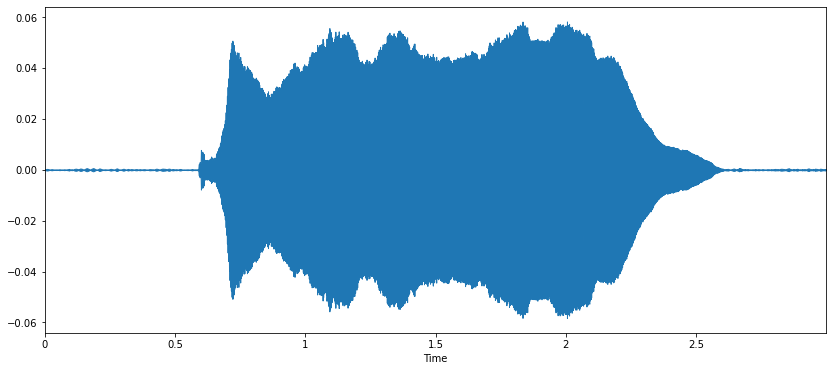

In [ ]:
plt.figure(figsize=(14,6))
data, sample_rate = librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [ ]:
sample_rate

22050

In [ ]:
data

array([9.2617469e-05, 1.5532233e-04, 1.1693328e-04, ..., 1.7219031e-04,
       1.4872258e-04, 9.0634043e-05], dtype=float32)

Text(0.5, 1.0, 'Monophonic')

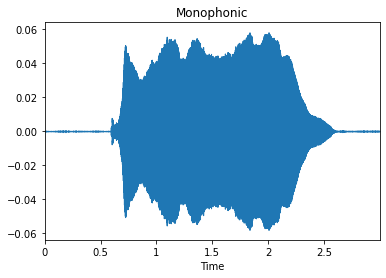

In [ ]:
y,sr=librosa.load("/content/drive/MyDrive/MAJOR PROJRCT CU/wavfiles/Flute/4bcc8a77.wav",duration=3)
plt.figure()
plt.subplot(1,1,1)
librosa.display.waveplot(y,sr=sr)
plt.title('Monophonic')
     

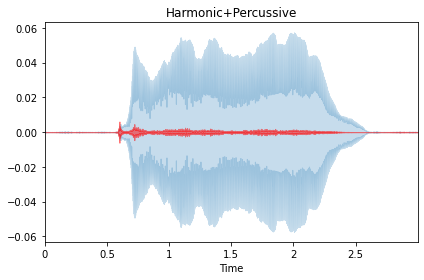

In [ ]:
y,sr=librosa.load("/content/drive/MyDrive/MAJOR PROJRCT CU/wavfiles/Flute/4bcc8a77.wav",duration=3)
y_harm,y_perc=librosa.effects.hpss(y)
plt.subplot(1,1,1)
librosa.display.waveplot(y_harm,sr=sr,alpha=0.25)
librosa.display.waveplot(y_perc,sr=sr,color='r',alpha=0.5)
plt.title('Harmonic+Percussive')
plt.tight_layout()
plt.savefig('signal.png')

In [ ]:
!pip install dtw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for dtw: filename=dtw-1.4.0-py3-none-any.whl size=5313 sha256=d0f11fe35485e312308b2581aa8fee8995144bbc9ce5e0799df7c21936981f8b
  Stored in directory: /root/.cache/pip/wheels/b4/fe/94/72ad3df3a67605236d3fac0891a64eef2eeedad1a1e0639076
Successfully built dtw


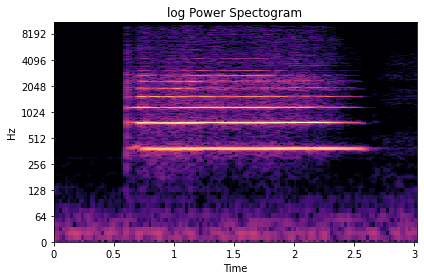

In [ ]:
import numpy as np
S,phase=librosa.magphase(librosa.stft(y=y))
librosa.display.specshow(librosa.amplitude_to_db(S,ref=np.max),y_axis='log',x_axis='time')
plt.title('log Power Spectogram')
plt.tight_layout()
plt.savefig('spectogram.png')

#KNN

In [ ]:
import os,fnmatch
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.metrics import confusion_matrix, f1_score, classification_report


import warnings
warnings.filterwarnings('ignore')

In [ ]:
file_path = "/content/drive/MyDrive/MAJOR PROJRCT CU/wavfiles"

In [ ]:
files = []
for root, dirnames, filenames in os.walk(file_path):
    for filename in fnmatch.filter(filenames, '*.wav'):
        files.append(os.path.join(root, filename))

print("found %d audio files in %s"%(len(files),file_path))

found 300 audio files in /content/drive/MyDrive/MAJOR PROJRCT CU/wavfiles


In [ ]:

# Get Labels
labels =[]
classes=['Cello','Flute','Double_bass','Saxophone','Bass_drum','Violin','guiter','clarinet','hat','Snare_drum','other']
color_dict={'Cello':'blue', 'Flute':'red', 'Double_bass':'green', 'Saxophone':'black', 'Bass_drum':'magenta','guiter':'purple', 'Violin':'yellow','clarinet':'pink','hat':'pink','Snare_drum':'white','other':'teal'}
color_list=[]
for filename in files:
    for name in classes:
        if fnmatch.fnmatchcase(filename, '*'+name+'*'):
            labels.append(name)
            color_list.append(color_dict[name])
            break
    else:
        labels.append('other')

In [ ]:
# Encode Labels
labelencoder = LabelEncoder()
labelencoder.fit(labels)
print(len(labelencoder.classes_), "classes:", ", ".join(list(labelencoder.classes_)))
classes_num = labelencoder.transform(labels)

    

10 classes: Bass_drum, Cello, Double_bass, Flute, Saxophone, Snare_drum, Violin, guiter, hat, other


In [ ]:
# Parameters
# Signal Processing Parameters
fs = 44100         # Sampling Frequency
n_fft = 2048       # length of the FFT window
hop_length = 512   # Number of samples between successive frames
n_mels = 128       # Number of Mel bands
n_mfcc = 13        # Number of MFCCs

# Machine Learning Parameters
testset_size = 0.25 #Percentage of data for Testing
n_neighbors=1       # Number of neighbors for kNN Classifier
     

In [ ]:
# Define Function to Calculate MFCC, Delta_MFCC and Delta2_MFCC
def get_features(y, sr=fs):
    S = librosa.feature.melspectrogram(y, sr=fs, n_mels=n_mels)
    mfcc = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=n_mfcc)
    feature_vector = np.mean(mfcc,1)
    #feature_vector = (feature_vector-np.mean(feature_vector))/np.std(feature_vector)
    return feature_vector

In [ ]:
# Load audio files, calculate features and create feature vectors
feature_vectors = []
sound_paths = []
for i,f in enumerate(files):
    print ("get %d of %d = %s"%(i+1, len(files), f))
    try:
        y, sr = librosa.load(f, sr=fs)
        y/=y.max() #Normalize
        if len(y) < 2:
            print("Error loading %s" % f)
            continue
        feat = get_features(y, sr)
        feature_vectors.append(feat)
        sound_paths.append(f)
    except Exception as e:
        print("Error loading %s. Error: %s" % (f,e))
        
print("Calculated %d feature vectors"%len(feature_vectors))

get 1 of 300 = /content/drive/MyDrive/MAJOR PROJRCT CU/wavfiles/Bass_drum/921eee9d.wav
get 2 of 300 = /content/drive/MyDrive/MAJOR PROJRCT CU/wavfiles/Bass_drum/bea51ca5.wav
get 3 of 300 = /content/drive/MyDrive/MAJOR PROJRCT CU/wavfiles/Bass_drum/6d21ad67.wav
get 4 of 300 = /content/drive/MyDrive/MAJOR PROJRCT CU/wavfiles/Bass_drum/4ba2b70e.wav
get 5 of 300 = /content/drive/MyDrive/MAJOR PROJRCT CU/wavfiles/Bass_drum/f8a99b37.wav
get 6 of 300 = /content/drive/MyDrive/MAJOR PROJRCT CU/wavfiles/Bass_drum/565f3ee2.wav
get 7 of 300 = /content/drive/MyDrive/MAJOR PROJRCT CU/wavfiles/Bass_drum/ca3f3698.wav
get 8 of 300 = /content/drive/MyDrive/MAJOR PROJRCT CU/wavfiles/Bass_drum/8b6a16de.wav
get 9 of 300 = /content/drive/MyDrive/MAJOR PROJRCT CU/wavfiles/Bass_drum/c11bacda.wav
get 10 of 300 = /content/drive/MyDrive/MAJOR PROJRCT CU/wavfiles/Bass_drum/ce3f3400.wav
get 11 of 300 = /content/drive/MyDrive/MAJOR PROJRCT CU/wavfiles/Bass_drum/7d11b3b4.wav
get 12 of 300 = /content/drive/MyDrive/MA

In [ ]:
# Scale features using Standard Scaler
scaler = StandardScaler()
scaled_feature_vectors = scaler.fit_transform(np.array(feature_vectors))
print("Feature vectors shape:",scaled_feature_vectors.shape)

Feature vectors shape: (300, 13)


In [ ]:
# Create Train and Test Set
splitter = StratifiedShuffleSplit(n_splits=1, test_size=testset_size, random_state=0)
splits = splitter.split(scaled_feature_vectors, classes_num)
for train_index, test_index in splits:
    train_set = scaled_feature_vectors[train_index]
    test_set = scaled_feature_vectors[test_index]
    train_classes = classes_num[train_index]
    test_classes = classes_num[test_index]

In [ ]:
# Check Set Shapes
print("train_set shape:",train_set.shape)
print("test_set shape:",test_set.shape)
print("train_classes shape:",train_classes.shape)
print("test_classes shape:",test_classes.shape)

train_set shape: (225, 13)
test_set shape: (75, 13)
train_classes shape: (225,)
test_classes shape: (75,)


In [ ]:
# KNN Classifier
n_neighbors=1
model_knn = KNeighborsClassifier(n_neighbors=n_neighbors)

In [ ]:
# kNN
model_knn.fit(train_set, train_classes);
     

# Predict using the Test Set
predicted_labels = model_knn.predict(test_set)

In [ ]:
#Evaluation
# Recall - the ability of the classifier to find all the positive samples
print("Recall: ", recall_score(test_classes, predicted_labels,average=None))

# Precision - The precision is intuitively the ability of the classifier not to 
#label as positive a sample that is negative
print("Precision: ", precision_score(test_classes, predicted_labels,average=None))

# F1-Score - The F1 score can be interpreted as a weighted average of the precision 
#and recall
print("F1-Score: ", f1_score(test_classes, predicted_labels, average=None))

# Accuracy - the number of correctly classified samples
print("Accuracy: %.2f  ," % accuracy_score(test_classes, predicted_labels,normalize=True), accuracy_score(test_classes, predicted_labels,normalize=False) )
print("Number of samples:",test_classes.shape[0])

Recall:  [0.75       1.         0.85714286 0.75       0.85714286 0.5
 0.5        0.375      1.         0.57142857]
Precision:  [1.         0.875      0.6        0.66666667 0.75       0.8
 0.4        0.5        0.875      0.8       ]
F1-Score:  [0.85714286 0.93333333 0.70588235 0.70588235 0.8        0.61538462
 0.44444444 0.42857143 0.93333333 0.66666667]
Accuracy: 0.71  , 53
Number of samples: 75


In [ ]:
print(classification_report(test_classes, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.88      1.00      0.93         7
           2       0.60      0.86      0.71         7
           3       0.67      0.75      0.71         8
           4       0.75      0.86      0.80         7
           5       0.80      0.50      0.62         8
           6       0.40      0.50      0.44         8
           7       0.50      0.38      0.43         8
           8       0.88      1.00      0.93         7
           9       0.80      0.57      0.67         7

    accuracy                           0.71        75
   macro avg       0.73      0.72      0.71        75
weighted avg       0.72      0.71      0.70        75



In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test_classes, predicted_labels)
np.set_printoptions(precision=2)
     

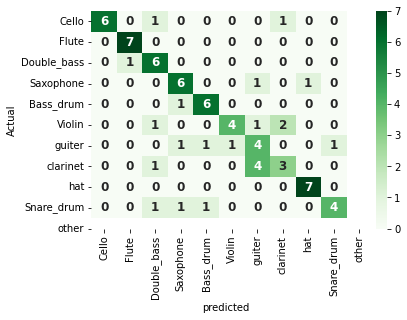

<Figure size 1296x648 with 0 Axes>

In [ ]:
import seaborn as sns
sns.heatmap(cnf_matrix,cmap="Greens", annot = True,
            xticklabels=classes,yticklabels=classes,
            annot_kws={'fontsize':12,'fontweight':'bold',})

plt.xlabel("predicted")
plt.ylabel("Actual")
plt.figure(figsize=(18,9))
plt.show()

In [ ]:
# Find wrong predicted samples indexes
#wrong_predictions = [i for i, (e1, e2) in enumerate(zip(test_classes, predicted_labels)) if e1 != e2]
wrong_predictions = [i for i, (e1, e2) in enumerate(zip(predicted_labels,test_classes)) if e1 != e2]
     

In [ ]:
# Find wrong predicted audio files
print(np.array(labels)[test_index[wrong_predictions]])
print(predicted_labels[wrong_predictions].T)
print(labelencoder.inverse_transform(predicted_labels[wrong_predictions]))
print(np.array(files)[test_index[wrong_predictions]])

['Snare_drum' 'guiter' 'Snare_drum' 'Violin' 'other' 'Snare_drum' 'guiter'
 'Violin' 'guiter' 'Bass_drum' 'Flute' 'Snare_drum' 'Violin' 'guiter'
 'Bass_drum' 'Violin' 'Double_bass' 'Flute' 'guiter' 'other' 'other'
 'Saxophone']
[2 6 7 9 3 7 2 5 6 7 8 6 4 6 2 3 1 6 6 4 2 3]
['Double_bass' 'Violin' 'guiter' 'other' 'Flute' 'guiter' 'Double_bass'
 'Snare_drum' 'Violin' 'guiter' 'hat' 'Violin' 'Saxophone' 'Violin'
 'Double_bass' 'Flute' 'Cello' 'Violin' 'Violin' 'Saxophone' 'Double_bass'
 'Flute']
['/content/drive/MyDrive/MAJOR PROJRCT CU/wavfiles/Snare_drum/5c33d972.wav'
 '/content/drive/MyDrive/MAJOR PROJRCT CU/wavfiles/guiter/34747922.wav'
 '/content/drive/MyDrive/MAJOR PROJRCT CU/wavfiles/Snare_drum/1c9a423f.wav'
 '/content/drive/MyDrive/MAJOR PROJRCT CU/wavfiles/Violin_or_fiddle/68589f79.wav'
 '/content/drive/MyDrive/MAJOR PROJRCT CU/wavfiles/Clarinet/2e1cd085.wav'
 '/content/drive/MyDrive/MAJOR PROJRCT CU/wavfiles/Snare_drum/c8ecbbfd.wav'
 '/content/drive/MyDrive/MAJOR PROJRCT CU/wav

In [ ]:
#choosing a k value

error_rate = []

for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_set, train_classes)
    pred_i = knn.predict(test_set)
    error_rate.append(np.mean(pred_i != test_classes))
    # wherever the pred value is not matching the test class value it will find the mean of that which will give the error rate.
     


Text(0, 0.5, 'Error Rate')

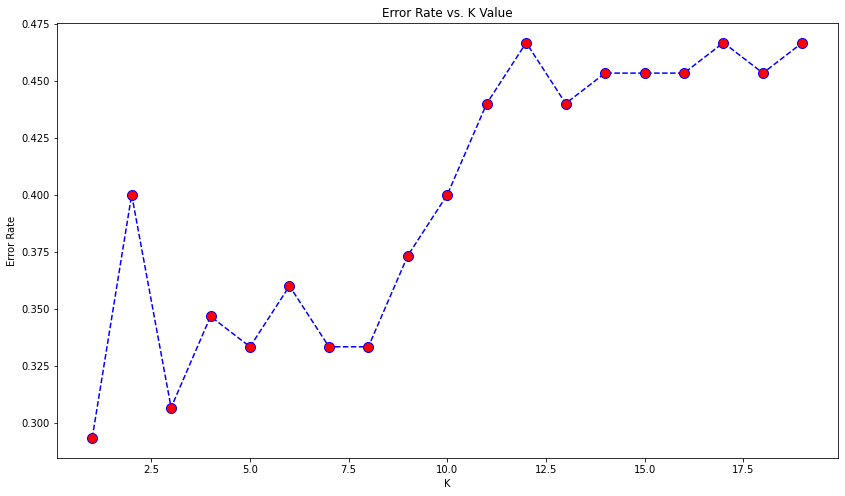

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(train_set, train_classes)
# Predict using the Test Set
predicted_labels = knn.predict(test_set)
     


In [ ]:
# Accuracy - the number of correctly classified samples
print("Accuracy: %.2f  ," % accuracy_score(test_classes, predicted_labels,normalize=True), accuracy_score(test_classes, predicted_labels,normalize=False) )
print("Number of samples:",test_classes.shape[0])
     

Accuracy: 0.67  , 50
Number of samples: 75
